Calculadora de CO2 Centro de Transparencia

Esta es una herramienta para calcular la cantidad de CO2 capturado en los planes de mitigacion en las zonas contiguas a  los PPII, para asegurar un 0% de emisiones.

Primero se deben llamar los paquetes de Python necesarios para el uso de la calculadora

In [2]:
#Operaciones Estadisticas Matematicas y Algebraicas
import numpy.random as rnd
import numpy as np
import math as m
from cmath import sqrt
import pandas as pd
from cmath import sqrt

#Graficar Objetos y Poligonos
from matplotlib.patches import Ellipse
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
#Style
plt.style.use(['default'])
#plt.style.use(['science','ieee'])

Datos de Estructura
 
 Se debe definir un diccionario con un catalogo de las escpecies encontradas en las zonas de Kale  y Platero.
 
 Este enumera las diferentes especiesy su medidas fisicas en una tabla 'pandas.dataframe'

In [3]:
#Vegtacion
dv = pd.read_csv("Datasets/Ecosistemas/Especies_Vegetales_Kale.csv")
dv2 = pd.read_csv("Datasets/Ecosistemas/Especies_Vegetales_Platero.csv")

In [4]:
#Se pueden apreciar ver los campos de las tabla con el dicionario de especies
print(dv.head(2))
print(dv2.head(2))

   Key1                   Proyecto                                    Species  \
0     1  EIA PPII - KALE sobre YNC  Abarema jupunba (Willd.) Britton & Killip   
1     2  EIA PPII - KALE sobre YNC         Albizia niopoides (Benth.) Burkart   

   DAP_INDIV  AB_INDIV   VOL_COM  VOL_TOTAL    H_TOTAL    H_FUSTE  BIOM_INDIV  \
0   0.200625  0.036560  0.580672   0.491187  18.333333   7.000000   19.716824   
1   0.234218  0.046419  4.134947   0.740284  22.727273  10.727273   25.104187   

   CARB_INDIV  Sum_CARB_INDIV  Sum_ID_INDV_MU  Count_ESPECIE  
0    9.858412       29.575236              75              3  
1   12.552094      138.073029             313             11  
   Key1                      Proyecto  \
0     1  EIA PPII - PLATERO sobre YNC   
1     2  EIA PPII - PLATERO sobre YNC   

                                     Species  DAP_INDIV  AB_INDIV   VOL_COM  \
0  Abarema jupunba (Willd.) Britton & Killip   0.251634  0.062843  6.007111   
1         Albizia niopoides (Benth.) Burk

In [5]:
#Se analizan cada uno de los campos de la tabla, segun las medidas estadisticas estandar (Conteo, Promedio, Desviacion, Minimo, Maximo)
print(dv.describe())
print(dv2.describe())


             Key1   DAP_INDIV    AB_INDIV     VOL_COM   VOL_TOTAL     H_TOTAL  \
count  199.000000  199.000000  199.000000  199.000000  199.000000  199.000000   
mean   100.366834    0.205096    0.043264    2.236042    0.501493   14.004418   
std     57.994436    0.086416    0.046516    6.008343    0.613803    3.863904   
min      1.000000    0.101859    0.008149    0.000010    0.034654    6.000000   
25%     50.500000    0.150720    0.018865    0.153985    0.163749   11.267857   
50%    100.000000    0.177239    0.028436    0.635403    0.308205   13.885714   
75%    150.500000    0.237982    0.049165    1.687257    0.565367   16.200000   
max    200.000000    0.623887    0.305705   59.516692    3.637887   30.000000   

          H_FUSTE  BIOM_INDIV  CARB_INDIV  Sum_CARB_INDIV  Sum_ID_INDV_MU  \
count  199.000000  199.000000  199.000000      199.000000      199.000000   
mean     5.763656   13.337841    6.668921       76.819296      292.472362   
std      2.534780    6.168710    3.0843

Como primer acercamiento a los datos medidos en Campo, se grafican las relaciones entre las medidas hechas para cada especie.
Aqui podemos ver los datos de las especies muestradas para las zonas de Kale y Platero,

En este ejemplo se relacionan:

1. El Diametro a la altura del Pecho (DAP) y la Biomasa 
2. El Diametro a la altura del Pecho (DAP) y la altura total de la planta 
3. El Diametro a la altura del Pecho (DAP) y la altura del fuste (Hojas)

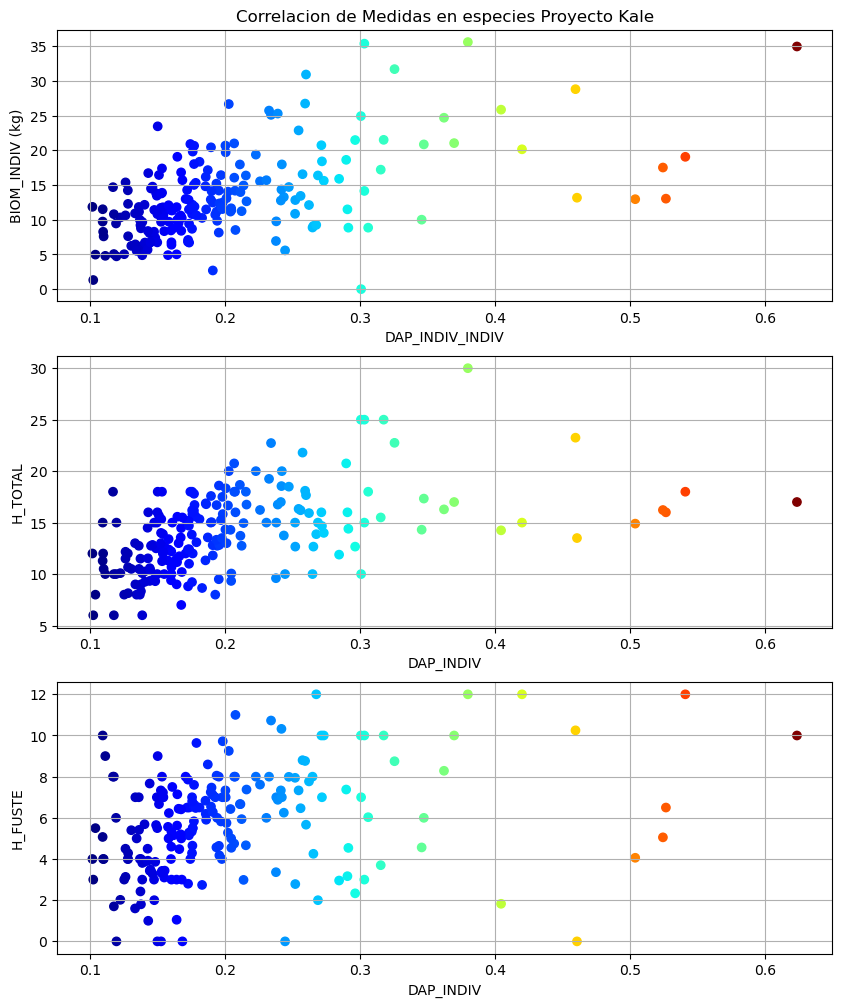

In [6]:
# Figure 1: DAP_INDIV_INDIV_INDIV vs Calculos de Biomasa

fig1,ax = plt.subplots(3,1,figsize=(10,12))
im = ax[0].scatter(dv.DAP_INDIV,dv.BIOM_INDIV,c=dv.DAP_INDIV,cmap='jet')
ax[0].set_xlabel('DAP_INDIV_INDIV')
ax[0].set_ylabel('BIOM_INDIV (kg)')
ax[0].grid(True)
ax[0].set_title('Correlacion de Medidas en especies Proyecto Kale')
#cbar0 = plt.colorbar(im)
#cbar0.set_label('Especie')

im1 = ax[1].scatter(dv.DAP_INDIV,dv.H_TOTAL	,c=dv.DAP_INDIV,cmap='jet')
ax[1].set_xlabel('DAP_INDIV')
ax[1].set_ylabel('H_TOTAL')
ax[1].grid(True)
#cbar2 = plt.colorbar(im1)
#cbar2.set_label('Especie')

im2 = ax[2].scatter(dv.DAP_INDIV,dv.H_FUSTE ,c=dv.DAP_INDIV,cmap='jet')
ax[2].set_xlabel('DAP_INDIV')
ax[2].set_ylabel('H_FUSTE')
ax[2].grid(True)
#cbar1 = plt.colorbar(im2)
#cbar1.set_label('Especie')

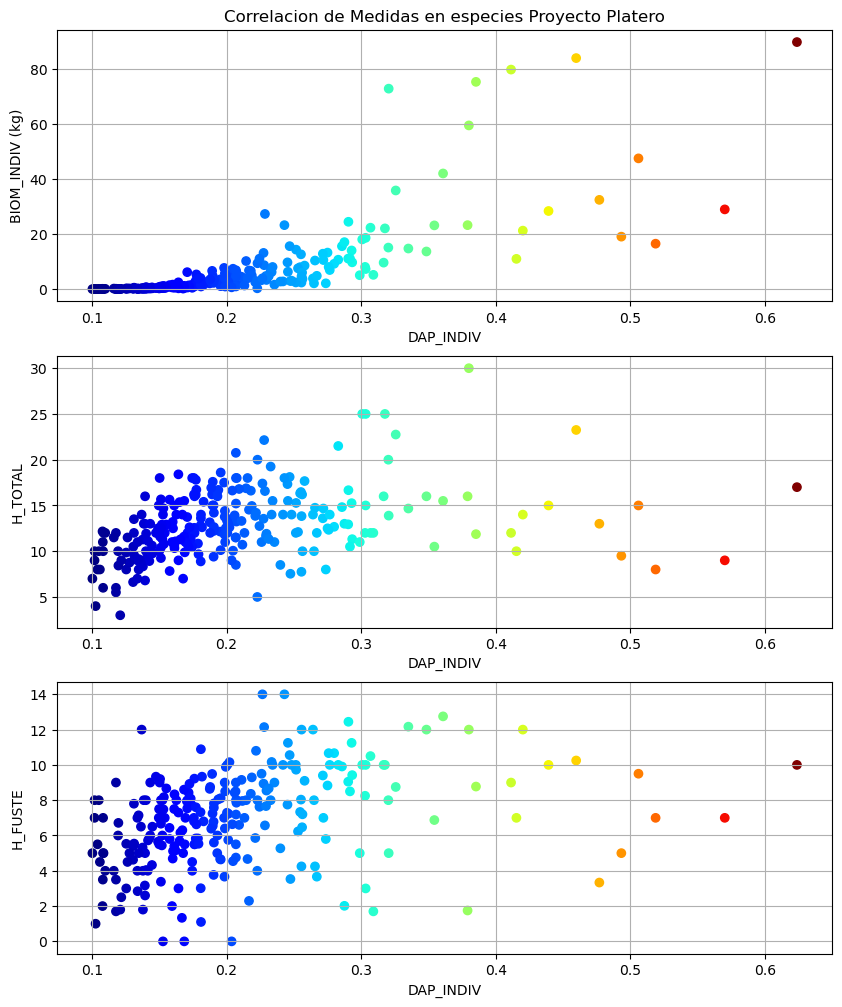

In [7]:
# Figure 2: DAP_INDIV_INDIV vs Calculos de Biomasa

fig1,ax = plt.subplots(3,1,figsize=(10,12))
im = ax[0].scatter(dv2.DAP_INDIV,dv2.BIOM_INDIV,c=dv2.DAP_INDIV,cmap='jet')
ax[0].set_xlabel('DAP_INDIV')
ax[0].set_ylabel('BIOM_INDIV (kg)')
ax[0].grid(True)
ax[0].set_title('Correlacion de Medidas en especies Proyecto Platero')
#cbar0 = plt.colorbar(im)
#cbar0.set_label('Especie')

im1 = ax[1].scatter(dv2.DAP_INDIV,dv2.H_TOTAL	,c=dv2.DAP_INDIV,cmap='jet')
ax[1].set_xlabel('DAP_INDIV')
ax[1].set_ylabel('H_TOTAL')
ax[1].grid(True)
#cbar2 = plt.colorbar(im1)
#cbar2.set_label('Especie')

im2 = ax[2].scatter(dv2.DAP_INDIV,dv2.H_FUSTE ,c=dv2.DAP_INDIV,cmap='jet')
ax[2].set_xlabel('DAP_INDIV')
ax[2].set_ylabel('H_FUSTE')
ax[2].grid(True)
#cbar1 = plt.colorbar(im2)
#cbar1.set_label('Especie')

Tambien se grafican las varibles en en diagramas 3D para comprender la relacion que se ven en las caracteristicas fisicas para cada una de las especies. Para los proyectos de Kale y Platero

In [8]:
# 3D representation

fig = px.scatter_3d(dv,x=dv.DAP_INDIV,y=dv.BIOM_INDIV,z=dv.H_TOTAL,color=dv.Species,
                    log_x=False,width=1200, height=800)
fig1 = px.scatter_3d(dv2,x=dv2.DAP_INDIV,y=dv2.BIOM_INDIV,z=dv2.H_TOTAL,color=dv2.Species,
                    log_x=False,width=1200, height=800)
fig.show()
fig1.show()

In [9]:
df = dv.copy()
df2 = dv2.copy()


Para comprender si existe mas relaciones entre las variables muestradas para mabos proyextos se elabora una diagrama de correlacion entre las variables.

<AxesSubplot:>

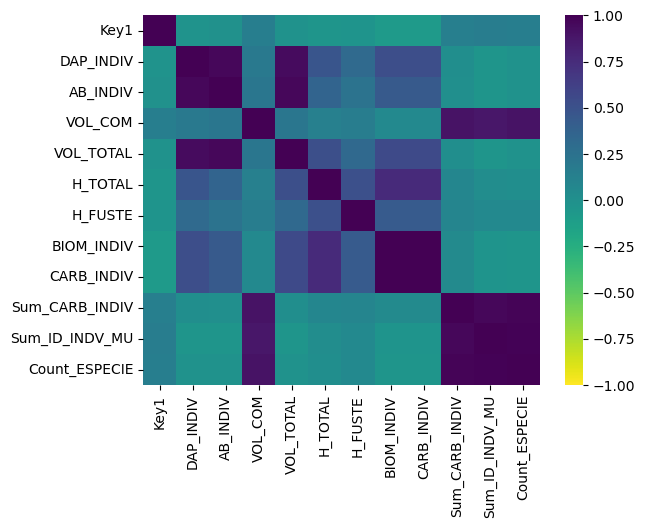

In [10]:
import seaborn as sns
sns.heatmap(df.corr(), cmap='viridis_r', vmin=-1, vmax=1)

Aqui podemos ver cual es la correlacion de los valores registrados en catalogo, lo cual indica que las variables que se correlacionan entre si.

<AxesSubplot:>

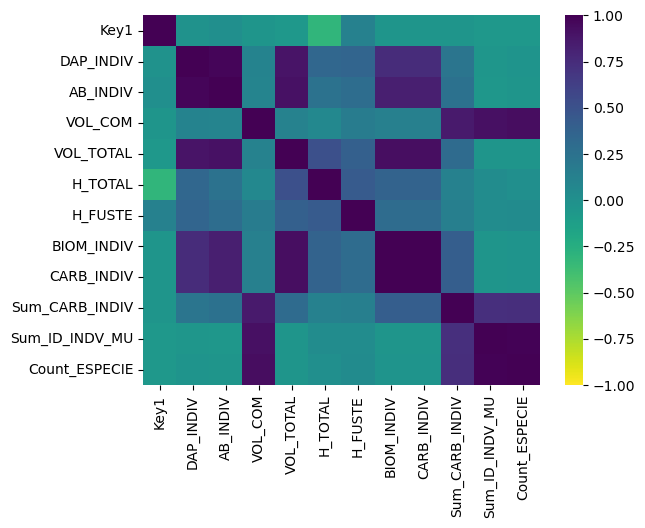

In [11]:
import seaborn as sns
sns.heatmap(df2.corr(), cmap='viridis_r', vmin=-1, vmax=1)

Aqui podemos vamos a realiazar un modelo de Machine Learning para evaluar los datos tomaso en campo y poder predecir valores de diferentes especies 

Para esto vamos a realizar una regresion lineal
Esta sera calulada con una parte de (Datos de Entrenamiento), y en base a este calculo evaluaremos la parte de los datos restantes (Datos de Prueba).
Una vez creado y testeado el modelo de datos con los datos medidos en campo , se pueden hacer predicciones. 

In [12]:
# para la Regresion Lineal, la segmantacion de los datos y la creacion del Modelo necesitaremos estos paquetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# solution
# Dividir los datos en conjuntos de entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(np.expand_dims(df['DAP_INDIV'], axis=1),df['BIOM_INDIV'], test_size=0.33, random_state=42)
print(df['DAP_INDIV'].shape, np.expand_dims(df['BIOM_INDIV'], axis=1).shape)
print(len(X_train), len(y_train), len(X_test), len( y_test))


(199,) (199, 1)
133 133 66 66


In [ ]:
# solution
# Dividir los datos en conjuntos de entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(np.expand_dims(df['DAP_INDIV'], axis=1),df['BIOM_INDIV'], test_size=0.33, random_state=42)
print(df['DAP_INDIV'].shape, np.expand_dims(df['BIOM_INDIV'], axis=1).shape)
print(len(X_train), len(y_train), len(X_test), len( y_test))


Coefficients: 
 [35.57048191]
Mean squared error: 35.43
Coefficient of determination: 0.22


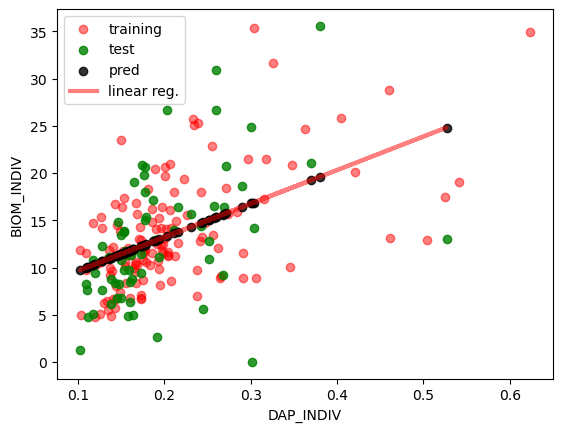

In [14]:

# Crear objeto de regresión lineal
regr = LinearRegression()

# Entrena el modelo usando los conjuntos de entrenamiento.
regr.fit(X_train, y_train)

# Hacer predicciones utilizando el conjunto de prueba
y_pred = regr.predict(X_test)

# para evaluar la calidad de nuesro modelo, usamos diferentes coeficientes
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_train, y_train, color="red", label='training', alpha=0.5)
plt.scatter(X_test, y_test, color="green", label='test', alpha=0.8)
plt.scatter(X_test, y_pred, color="black", label='pred', alpha=0.8)
plt.plot(X_test, y_pred, color="red", linewidth=3, label='linear reg.', alpha=0.5)
plt.xlabel('DAP_INDIV')
plt.ylabel('BIOM_INDIV')
plt.legend()

Hacemos el mismo procedimento para los diferentes datos del proyecto, es necesario tener en cuenta que este metodologia se puede aplicar a cualquier conjunto de datos. (Ya sean subgrupos taxonomicos en una especie en particular)

(199,) (199, 1)
133 133 66 66
Coefficients: 
 [1.14336718]
Mean squared error: 14.21
Coefficient of determination: 0.69


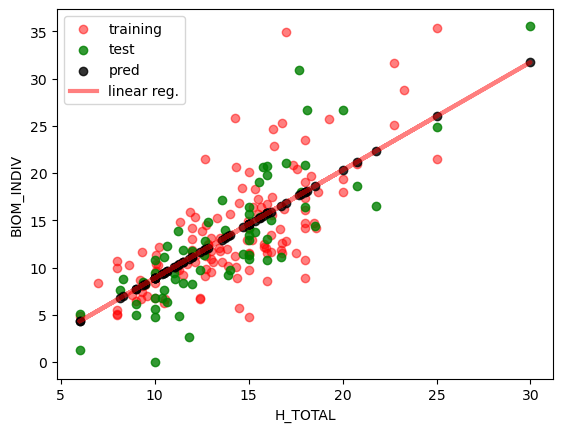

In [15]:
# Solution
# Dividir los datos en conjuntos de entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(np.expand_dims(df['H_TOTAL'], axis=1),df['BIOM_INDIV'], test_size=0.33, random_state=42)
print(df['H_TOTAL'].shape, np.expand_dims(df['BIOM_INDIV'], axis=1).shape)
print(len(X_train), len(y_train), len(X_test), len( y_test))

# Crear objeto de regresión lineal
regr = LinearRegression()

# Entrena el modelo usando los conjuntos de entrenamiento.
regr.fit(X_train, y_train)

# Hacer predicciones utilizando el conjunto de prueba
y_pred = regr.predict(X_test)

#  Para evaluar la calidad de nuesro modelo, usamos diferentes coeficientes
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_train, y_train, color="red", label='training', alpha=0.5)
plt.scatter(X_test, y_test, color="green", label='test', alpha=0.8)
plt.scatter(X_test, y_pred, color="black", label='pred', alpha=0.8)
plt.plot(X_test, y_pred, color="red", linewidth=3, label='linear reg.', alpha=0.5)
plt.xlabel('H_TOTAL')
plt.ylabel('BIOM_INDIV')
plt.legend()

De igual forma obtenemos nuestra modelo para la altura del Fuste

(199,) (199, 1)
133 133 66 66
Coefficients: 
 [0.99647318]
Mean squared error: 36.14
Coefficient of determination: 0.20


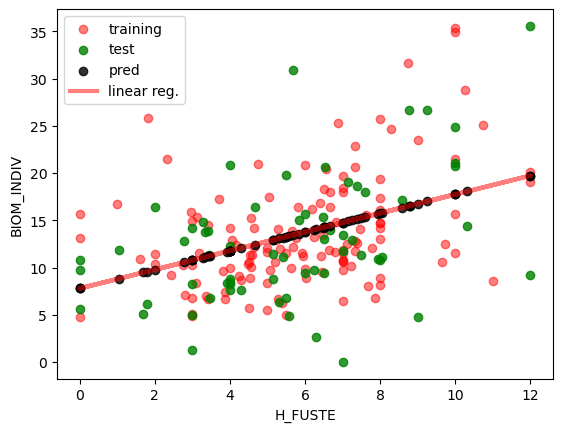

In [16]:
# Solution
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(np.expand_dims(df['H_FUSTE'], axis=1),df['BIOM_INDIV'], test_size=0.33, random_state=42)
print(df['H_FUSTE'].shape, np.expand_dims(df['BIOM_INDIV'], axis=1).shape)
print(len(X_train), len(y_train), len(X_test), len( y_test))

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_train, y_train, color="red", label='training', alpha=0.5)
plt.scatter(X_test, y_test, color="green", label='test', alpha=0.8)
plt.scatter(X_test, y_pred, color="black", label='pred', alpha=0.8)
plt.plot(X_test, y_pred, color="red", linewidth=3, label='linear reg.', alpha=0.5)
plt.xlabel('H_FUSTE')
plt.ylabel('BIOM_INDIV')
plt.legend()

In [17]:
print(len(X_train), len(y_train), len(X_test), len( y_test))

133 133 66 66


In [18]:
#Selecion de Columnas
dv.loc[:, ['Species','CARB_INDIV']]

,Species,CARB_INDIV
0,Abarema jupunba (Willd.) Britton & Killip,9.858412
1,Albizia niopoides (Benth.) Burkart,12.552094
2,Alchornea cf. triplinervia (Spreng.) Müll. Arg.,6.083282
3,Alchornea triplinervia (Spreng.) Mull. Arg.,4.921130
4,Amaioua corymbosa Kunt.,5.129315
...,...,...
194,Xylopia discreta (L.f.) Sprague & Hutch.,5.315090
195,Xylopia emarginata Mart.,6.044771
196,Xylopia polyantha R.E.Fr.,6.887994
197,Zygia inaequalis (Willd.) Pittier,5.676524


In [19]:
#Selecion de Columnas
dv2.loc[:, ['Species','CARB_INDIV']]

,Species,CARB_INDIV
0,Abarema jupunba (Willd.) Britton & Killip,7.183193
1,Albizia niopoides (Benth.) Burkart,4.359773
2,Andira chigorodensis R.T. Penn.,0.315758
3,Aniba paraensis (Meissner) Mel.,2.378522
4,Apeiba membranacea Benth.,0.090118
...,...,...
246,Faramea lehmannii Standl.,0.058341
247,Guarea guidonia (L.) Sleumer,0.045002
248,Tessaria integrifolia Ruiz & Pav.,0.006200
249,Coccoloba lehmannii Lindau,0.015644


Ahora que tenemos una clara vision de como se relacionan las variables en campo, podemos calcular la cantidad de CO2 capturado por cada planta.

Este calculo de basa en las Funciones alometricas de cada especie y region.

Para esto se generan una serie de fuciones que evaluan la cantidad de CO2 capturado por cada planta.

La funcion evalua la cantidad de CO2 segun el numero de especies en un area determinada.

Para este ejemplo estamos evaluando la funcion para un hectarea con 100 individuos de la misma especia, a lo largo de todo el catalogo del muestreo. 

In [20]:
#Cantidad de Cabono de poligono en el tiempo como Data Frame
#Tiempo en years y numero de individuos
N= 100
t = 1
#Dimensiones del Poligono en metros
X = 10000
Y = 10000
#Cantidad de Individuos
N=1
def CO2_Total_df (S,X ,Y, N, C, t):
    TC = N * C * t
    return pd.DataFrame(index = [S, TC]), 


In [21]:
#Cantidad de Cabono de poligono en el tiempo como Vector
def CO2_Total (S, X ,Y, N, C, t):
    TC = N * C * t
    return TC


In [22]:
# Evaluar las funciones Sobre todos los Datos Kale
CO2_Total(dv.Species,10000,10000,100,dv.CARB_INDIV,5)

H=CO2_Total_df(dv.Species,1,1,10,dv.CARB_INDIV,5)
TC= CO2_Total(dv.Species,1,1,10,dv.CARB_INDIV,5)

In [23]:
# Evaluar las funciones Sobre todos los Datos Platero
CO2_Total(dv2.Species,10000,10000,100,dv.CARB_INDIV,5)

H2=CO2_Total_df(dv2.Species,1,1,10,dv2.CARB_INDIV,5)
TC2= CO2_Total(dv2.Species,1,1,10,dv2.CARB_INDIV,5)

In [24]:
# Se debe verificar el tipo de resultado que esta generando la funcion para saber como operar el resultado 
print(type(H))
print(type(TC))
print(type(H2))
print(type(TC2))
len(TC2)

<class 'tuple'>
<class 'pandas.core.series.Series'>
<class 'tuple'>
<class 'pandas.core.series.Series'>


251

In [25]:
nc=np.array(TC)
pn=np.append(nc, 0)
pn.shape
reshaped1 = pn.reshape(10,20)
#reshaped1

In [26]:
nc2=np.array(TC2)
pn2=np.append(nc2,[0,0,0,0,0,0,0,0,0])
pn2.shape
reshaped2 = pn2.reshape(10,26)
#reshaped1

In [27]:
print(np.shape(reshaped1))
print(np.shape(reshaped2))

(10, 20)
(10, 26)


Text(0.5, 1.0, 'Total de CO2 (kg) capturado por hectarea \n de Vegetacion segun especie en el EIA Kale')

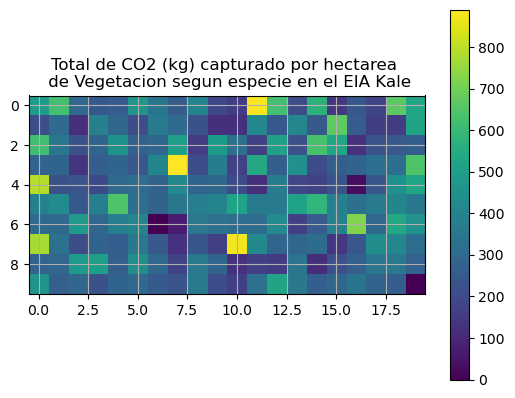

In [33]:
#uso de plt funtions para graficar matricez
plt.figure(1)
plt.grid(True)
plt.imshow(reshaped1)
plt.show
plt.colorbar()
plt.title("Total de CO2 (kg) capturado por hectarea \n de Vegetacion segun especie en el EIA Kale")

#print(x,y)


Text(0.5, 1.0, 'Total de CO2 (kg) capturado por hectarea \n de Vegetacion segun especie en el EIA Platero')

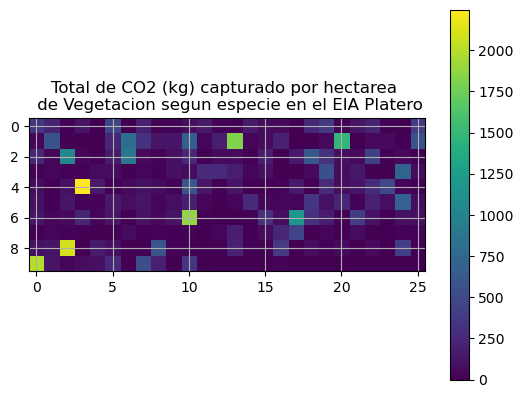

In [34]:

#uso de plt funtions para graficar matricez
plt.figure(1)
plt.grid(True)
plt.imshow(reshaped2)
plt.show
plt.colorbar()
plt.title("Total de CO2 (kg) capturado por hectarea \n de Vegetacion segun especie en el EIA Platero")

#print(x,y)


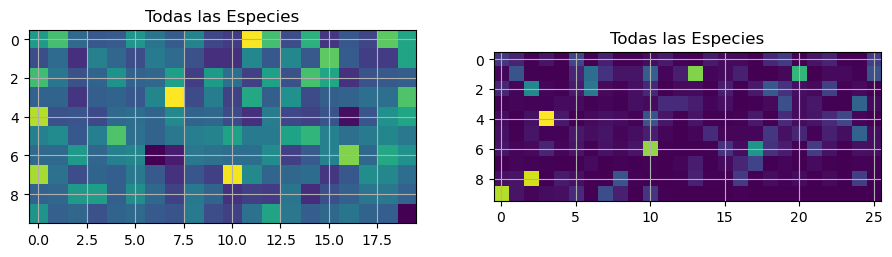

In [31]:
fig,ax=plt.subplots(1,2,figsize=(11,8))
ax[0].imshow(reshaped1)
ax[0].set_title('Todas las Especies')
ax[0].grid(True)
ax[1].imshow(reshaped2)
ax[1].set_title('Todas las Especies')
ax[1].grid(True)


Se crea un sistema que determine la cantidad de CO2 capturado por nuevas zonas de reforestacion que tambien permitiran una mejora en la conectividad de los ecosistemas de la zona



Definir la funcion para populate el cuadro

In [142]:
x=m.ceil(sqrt(len(dv)+1).real)
xf=m.ceil(sqrt(len(dv)+1).real)
type(len(dv))
#d = round(x)
m.ceil(sqrt(len(dv)+1).real)


15

In [143]:
def graf_scatt(DataFrame):
    fig = go.Figure()
    fig = px.scatter(DataFrame, x="VOL_COM", y="CARB_INDIV",
                     size="Sum_ID_INDV_MU", color="Species", hover_name="Species", size_max=55)
    fig.update_layout(transition_duration=500)
    return fig

In [144]:
figsc_v = graf_scatt(dv)
figsc_v.show()
#plt(figsc_v)

In [145]:
figsc_v = graf_scatt(dv2)
figsc_v.show()
#plt(figsc_v)

In [111]:
def graf_heat(DataFrame):
    fig = go.Figure()
    fig = px.density_heatmap(DataFrame, x="Key1", y="Key1",z="CARB_INDIV")
    fig.update_layout(transition_duration=500)
    return fig